## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [3]:
num_categorical_variables = df.select_dtypes(include=['int64']).shape[1]
print(f'Number of categorical variables: {num_categorical_variables}')

Number of categorical variables: 7


In [4]:
df.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
dtypes = df.dtypes
dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [6]:
for i in range(len(df.columns)):
    # Calculate the number of missing entries for the current column
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


In [7]:
total_missing_data = df.isna().sum().sum()
print(f'Total Missing Entries: {total_missing_data}')

Total Missing Entries: 645


### Bonus: Visual representation of missing values

<Axes: >

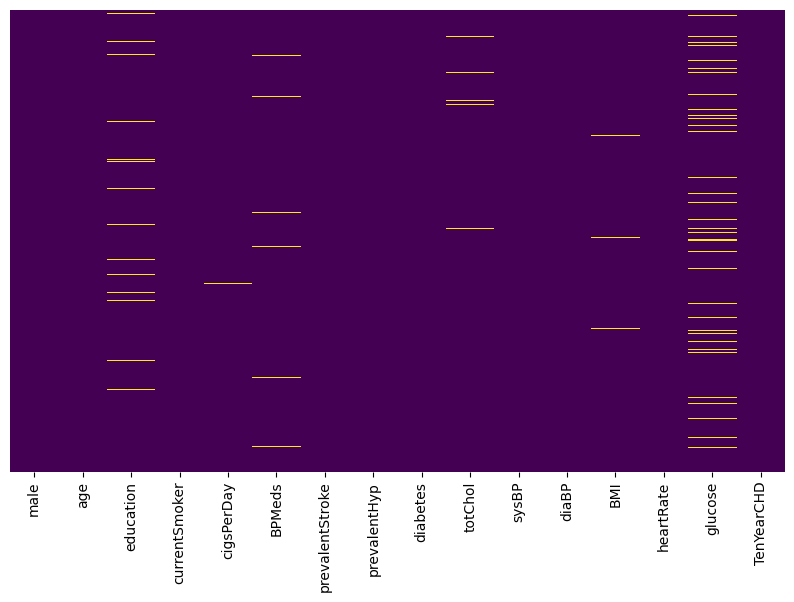

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [9]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [10]:
# Create a SimpleImputer object with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [11]:
data = df.values

In [12]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [13]:
imputer.fit(df)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [14]:
df_filled = imputer.transform(df)

### Sanity Check: Whether missing values are filled or not

In [15]:
total_missing_data = df.isna().sum().sum()
print(f'Total Missing Entries: {total_missing_data}')

Total Missing Entries: 645


In [16]:
missing_values = np.isnan(df_filled).sum()
print(f'Total Missing Entries: {missing_values}')

Total Missing Entries: 0


### Let's try to visualize the missing values.

<Axes: >

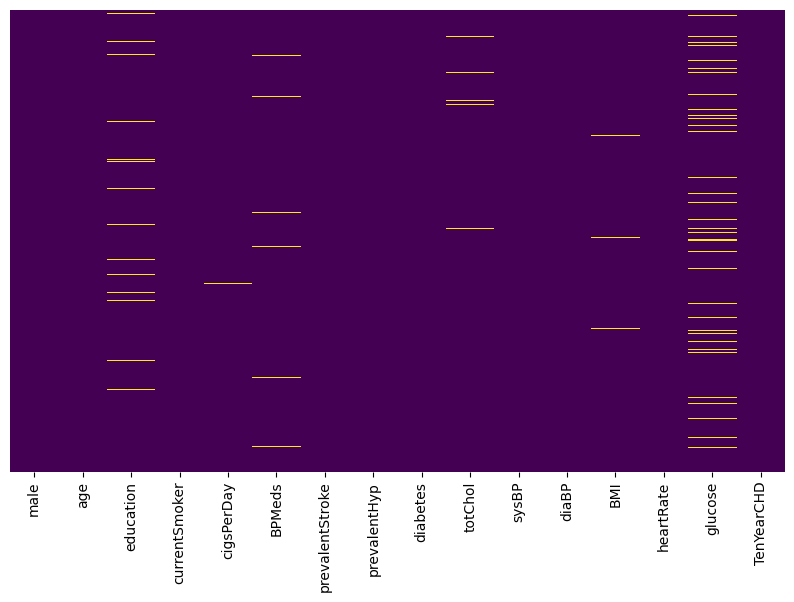

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

Text(0.5, 36.72222222222221, 'Features')

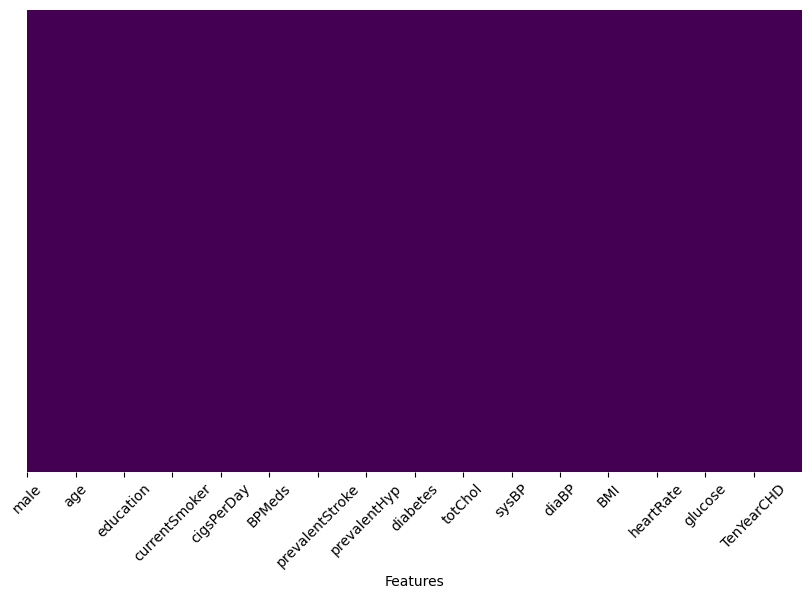

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(np.isnan(df_filled), cbar=False, cmap='viridis', yticklabels=False)
plt.xticks(range(df.shape[1]), df.columns, rotation=45)
plt.xlabel("Features")

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [19]:
df_transform = pd.DataFrame(df_filled)
df_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


In [20]:
df_transform1 = pd.DataFrame(data)
df_transform1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0,0.0
4235,0.0,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0.0


<Axes: >

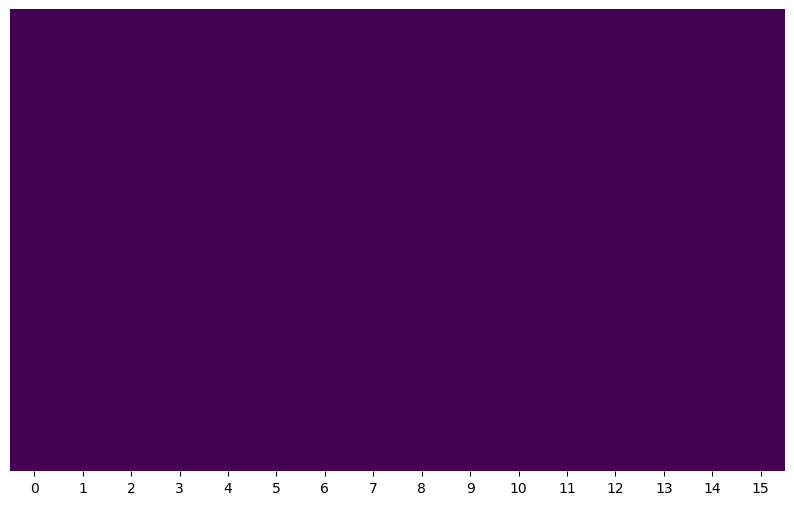

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

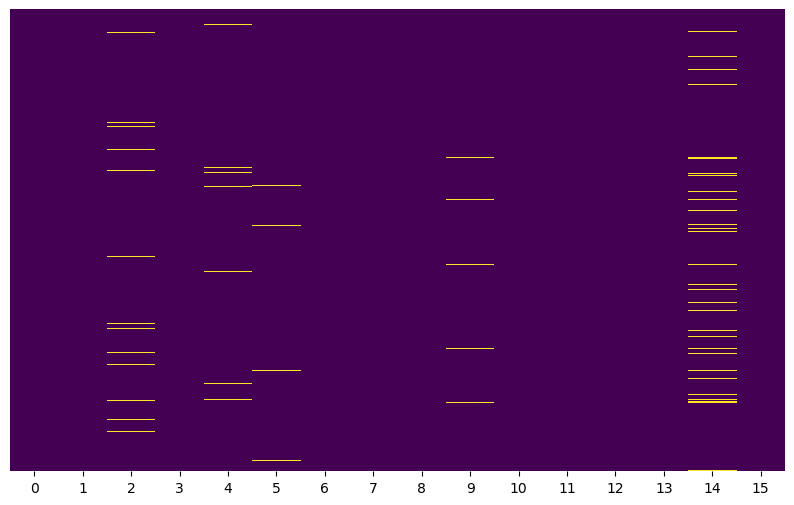

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform1.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [23]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [24]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

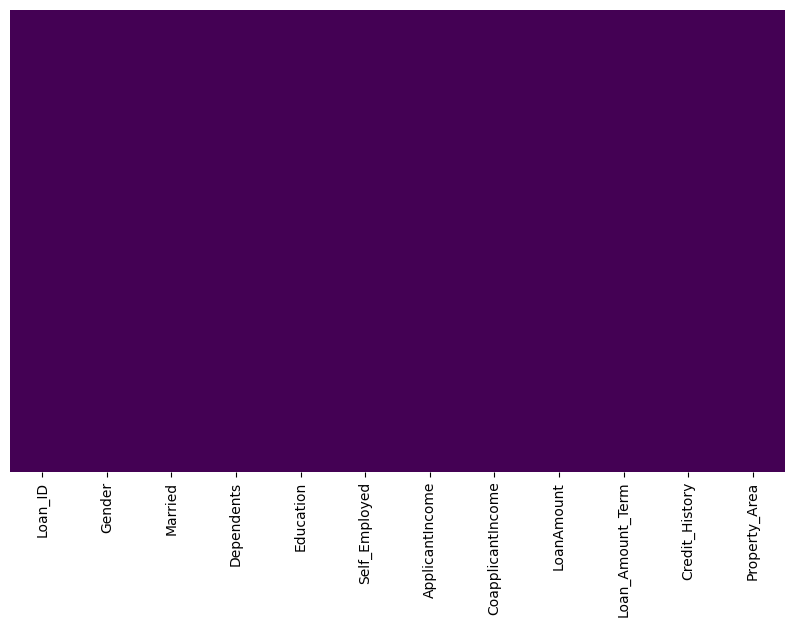

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [26]:
X_train_total_missing_data = X_train.isna().sum().sum()
print(f'Total Missing Entries: {X_train_total_missing_data}')

Total Missing Entries: 0


# Build a Logistic Regression model Without imputation

In [27]:
df=pd.read_csv("heart_disease.csv")
df = df.fillna(df.mean())
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
model = LogisticRegression(max_iter=10000)

In [30]:
model.fit(X,y)

LogisticRegression(max_iter=10000)

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [32]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [33]:
df.shape

(4238, 16)

### Drop rows with missing values

In [34]:
df.dropna(inplace=True)
df.shape

(3656, 16)

### Split dataset into X and y

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 15)
X_test shape: (848, 15)
y_train shape: (3390,)
y_test shape: (848,)


In [36]:
X = df[df.columns[:-1]]
X.shape

(3656, 15)

In [37]:
y = df[df.columns[-1]]
y.shape

(3656,)

### Create a pipeline with model parameter

In [38]:
pipeline = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [39]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [40]:
scores_drop = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [41]:
scores_drop

array([0.85245902, 0.85519126, 0.85245902, 0.8579235 , 0.84972678,
       0.8442623 , 0.85205479, 0.8739726 , 0.84931507, 0.85479452,
       0.86338798, 0.84972678, 0.8579235 , 0.84699454, 0.8442623 ,
       0.84699454, 0.85753425, 0.85205479, 0.85479452, 0.84931507,
       0.85245902, 0.86338798, 0.84972678, 0.8442623 , 0.87431694,
       0.84699454, 0.85479452, 0.84931507, 0.85753425, 0.84657534])

### Print the Mean Accuracy and Standard Deviation from scores

In [42]:
print(f"Mean Accuracy: {round(np.mean(scores_drop), 3)}  | Std: {round(np.std(scores_drop), 3)}")

Mean Accuracy: 0.853  | Std: 0.007


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [44]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [45]:
df.shape

(4238, 16)

In [46]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [47]:
y = df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [48]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [49]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [50]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [51]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [52]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [53]:
scores

array([0.85141509, 0.85377358, 0.84669811, 0.8490566 , 0.84669811,
       0.84669811, 0.8490566 , 0.8490566 , 0.8534279 , 0.85106383,
       0.8490566 , 0.85141509, 0.8490566 , 0.85613208, 0.84669811,
       0.84669811, 0.84433962, 0.84669811, 0.8534279 , 0.85579196,
       0.85141509, 0.85141509, 0.8490566 , 0.84669811, 0.85141509,
       0.85849057, 0.85141509, 0.85141509, 0.85106383, 0.8463357 ])

### Print the Mean Accuracy and Standard Deviation

In [54]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.85  | Std: 0.003


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

In [55]:
mean_diff = np.mean(scores_drop) - np.mean(scores)
std_diff = np.std(scores_drop) - np.std(scores)

if mean_diff > 0:
    print(f"\nMethod 1 (Dropped) has higher mean accuracy by {round(mean_diff, 3)}")
elif mean_diff < 0:
    print(f"\nMethod 2 (Imputed) has higher mean accuracy by {round(abs(mean_diff), 3)}")
else:
    print("\nBoth methods have similar mean accuracy.")

if std_diff > 0:
    print(f"Method 1 (Dropped) has higher standard deviation by {round(std_diff, 3)}")
elif std_diff < 0:
    print(f"Method 2 (Imputed) has higher standard deviation by {round(abs(std_diff), 3)}")
else:
    print("Both methods have similar standard deviation.")


Method 1 (Dropped) has higher mean accuracy by 0.003
Method 1 (Dropped) has higher standard deviation by 0.004


In [56]:
from scipy import stats
# Assuming you have scores for dropped and imputed data as scores_drop and scores
# Calculate the mean and standard deviation for both sets of scores
mean_drop = np.mean(scores_drop)
std_drop = np.std(scores_drop)
mean_imputed = np.mean(scores)
std_imputed = np.std(scores)

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(scores_drop, scores)

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The difference in accuracy is statistically significant.")
    if mean_drop > mean_imputed:
        print("Dropping missing values is significantly more accurate.")
    else:
        print("Imputing missing values is significantly more accurate.")
else:
    print("The difference in accuracy is not statistically significant.")

The difference in accuracy is statistically significant.
Dropping missing values is significantly more accurate.


In [57]:
from scipy import stats
# Assuming you have scores for dropped and imputed data as scores_drop and scores
# Calculate the mean and standard deviation for both sets of scores
mean_drop = np.mean(scores_drop)
std_drop = np.std(scores_drop)
mean_imputed = np.mean(scores)
std_imputed = np.std(scores)

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(scores_drop, scores)

# Define a significance level (e.g., 0.05)
alpha = 0.10

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The difference in accuracy is statistically significant.")
    if mean_drop > mean_imputed:
        print("Dropping missing values is significantly more accurate.")
    else:
        print("Imputing missing values is significantly more accurate.")
else:
    print("The difference in accuracy is not statistically significant.")

The difference in accuracy is statistically significant.
Dropping missing values is significantly more accurate.


In [58]:
print("Dropping the missing Values brings a higher accuracy according to the P Test and Observing the difference between the mean and standard deviation")

Dropping the missing Values brings a higher accuracy according to the P Test and Observing the difference between the mean and standard deviation


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [60]:
imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [61]:
model = RandomForestClassifier()

### Create a pipeline

In [62]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

### Create RepeatedStratifiedKFold

In [63]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [64]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Print Mean Accuracy and Standard Deviation

In [65]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.006


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [66]:
results =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results.append(scores)
    
for method, accuracy in zip(strategies, results):
    print(f"Strategy: {method} >> Accuracy: {round(np.mean(accuracy), 3)}   |   Max accuracy: {round(np.max(accuracy), 3)}")
          
          

Strategy: mean >> Accuracy: 0.849   |   Max accuracy: 0.861
Strategy: median >> Accuracy: 0.849   |   Max accuracy: 0.863
Strategy: most_frequent >> Accuracy: 0.848   |   Max accuracy: 0.863
Strategy: constant >> Accuracy: 0.849   |   Max accuracy: 0.868


# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [67]:
# Define the Random Forest classifier
model = RandomForestClassifier(random_state=1)

# Define a list of imputation strategies
strategies = ['mean', 'median', 'most_frequent', 'constant']

# Initialize a dictionary to store results
results = {}

for s in strategies:
    # Create a pipeline with the imputer and the Random Forest model
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)), ('model', model)])
    
    # Perform cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # Store the accuracy scores in the results dictionary
    results[s] = scores

# Print the mean accuracy for each strategy
for method, accuracy in results.items():
    print(f"Strategy: {method} >> Mean Accuracy: {round(np.mean(accuracy), 3)}")

# Identify the best strategy
best_strategy = max(results, key=lambda k: np.mean(results[k]))
print(f"The best imputation strategy is: {best_strategy}")

Strategy: mean >> Mean Accuracy: 0.849
Strategy: median >> Mean Accuracy: 0.849
Strategy: most_frequent >> Mean Accuracy: 0.849
Strategy: constant >> Mean Accuracy: 0.849
The best imputation strategy is: median


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [68]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

# Define a list of algorithms to compare
algorithms = [
    ('Logistic Regression', LogisticRegression(random_state=1)),
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('KNN', KNeighborsClassifier()),  
    
]

# Initialize a dictionary to store results
results = {}

# Define the imputer with Mean Strategy
imputer = SimpleImputer(strategy='mean')

for name, model in algorithms:
    # Create a pipeline with the imputer and the current model
    pipeline = Pipeline([('impute', imputer), ('model', model)])
    
    # Perform cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # Store the accuracy scores in the results dictionary
    results[name] = scores

# Print the mean accuracy for each algorithm
for method, accuracy in results.items():
    print(f"Algorithm: {method} >> Mean Accuracy: {round(np.mean(accuracy), 3)}")

# Identify the best algorithm
best_algorithm = max(results, key=lambda k: np.mean(results[k]))
print(f"The best algorithm with Mean Strategy is: {best_algorithm}")

Algorithm: Logistic Regression >> Mean Accuracy: 0.85
Algorithm: Random Forest >> Mean Accuracy: 0.849
Algorithm: KNN >> Mean Accuracy: 0.837
The best algorithm with Mean Strategy is: Logistic Regression


In [69]:
# Define a list of algorithms to compare
algorithms = [
    ('Logistic Regression', LogisticRegression(random_state=1)),
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('KNN', KNeighborsClassifier()),  
    ('SVM', SVC()),  
]

# Initialize a dictionary to store results
results = {}


# Define the imputer with Mean Strategy
imputer = SimpleImputer(strategy='mean')

for name, model in algorithms:
    # Create a pipeline with the imputer and the current model
    pipeline = Pipeline([('impute', imputer), ('model', model)])
    
    # Perform cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # Store the accuracy scores in the results dictionary
    results[name] = scores

# Print the mean accuracy for each algorithm
for method, accuracy in results.items():
    print(f"Algorithm: {method} >> Mean Accuracy: {round(np.mean(accuracy), 3)}")

# Identify the best algorithm
best_algorithm = max(results, key=lambda k: np.mean(results[k]))
print(f"The best algorithm with Mean Strategy is: {best_algorithm}")

Algorithm: Logistic Regression >> Mean Accuracy: 0.85
Algorithm: Random Forest >> Mean Accuracy: 0.849
Algorithm: KNN >> Mean Accuracy: 0.837
Algorithm: SVM >> Mean Accuracy: 0.848
The best algorithm with Mean Strategy is: Logistic Regression


# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [70]:
# Define a list of algorithms and imputation strategies to compare
algorithms = [
    ('Logistic Regression', LogisticRegression(random_state=1)),
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('KNN', KNeighborsClassifier()) 
]

imputation_strategies = ['mean', 'median', 'most_frequent', 'constant']

# Initialize variables to keep track of the best combination
best_algorithm = None
best_strategy = None
best_accuracy = 0.0

for strategy in imputation_strategies:
    imputer = SimpleImputer(strategy=strategy)
    X_imputed = imputer.fit_transform(X)
    
    for name, model in algorithms:
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        pipeline = Pipeline([('model', model)])
        scores = cross_val_score(pipeline, X_imputed, y, scoring='accuracy', cv=cv, n_jobs=-1)
        
        mean_accuracy = np.mean(scores)
        
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_algorithm = name
            best_strategy = strategy

print(f"The best combination is: Algorithm: {best_algorithm} | Imputation Strategy: {best_strategy} | Mean Accuracy: {round(best_accuracy, 3)}")

The best combination is: Algorithm: Logistic Regression | Imputation Strategy: constant | Mean Accuracy: 0.85


In [71]:
# Define a list of algorithms and imputation strategies to compare
algorithms = [
    ('Logistic Regression', LogisticRegression(random_state=1)),
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())  
]

imputation_strategies = ['mean', 'median', 'most_frequent', 'constant']

# Initialize variables to keep track of the best combination
best_algorithm = None
best_strategy = None
best_accuracy = 0.0

for strategy in imputation_strategies:
    imputer = SimpleImputer(strategy=strategy)
    X_imputed = imputer.fit_transform(X)
    
    for name, model in algorithms:
        cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
        pipeline = Pipeline([('model', model)])
        scores = cross_val_score(pipeline, X_imputed, y, scoring='accuracy', cv=cv, n_jobs=-1)
        
        mean_accuracy = np.mean(scores)
        
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_algorithm = name
            best_strategy = strategy

print(f"The best combination is: Algorithm: {best_algorithm} | Imputation Strategy: {best_strategy} | Mean Accuracy: {round(best_accuracy, 3)}")

The best combination is: Algorithm: Logistic Regression | Imputation Strategy: median | Mean Accuracy: 0.85
